In [1]:
import numpy as np
import glob
import json
import os
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

from model import default_categorical
from utils import linear_bin, tub_to_array

In [2]:
train_tub_42 = '/home/projects/ironcar-dev/tubs/tub_20181113_42_evening/'
train_tub_5eme = '/home/projects/ironcar-dev/tubs/tub_20181122_ysance_noon/'
val_tub_race = '/home/projects/ironcar-dev/tubs/tub_20181124_morning_lesquare_horaire/'

img_example = '/home/projects/ironcar-dev/tubs/tub_20181124_morning_lesquare_antihoraire/291_cam-image_array_.jpg'
json_exple = '/home/projects/ironcar-dev/tubs/tub_20181124_morning_lesquare_antihoraire/record_291.json'

In [62]:
linear_bin(0.3, 3)

array([0., 1., 0.])

In [65]:
int(9.9)

9

In [3]:
# train validation split


#x_train_42, y_train_42 = tub_to_array(train_tub_42, n_class=3)
x_train_5eme, y_train_5eme = tub_to_array(train_tub_5eme, n_class=3)

x_val, y_val = tub_to_array(val_tub_race, n_class=3, n_first_files=500)


In [7]:
y_val

{'angle_cat_out': array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]]),
 'angle_float': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        ,  0.        ,
         0.        ,  0.        ,  0.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.       

In [ ]:
# fit model

epochs=100
steps=100
verbose=1
min_delta=.0005
patience=5
use_early_stop=True
saved_model_path = '/home/projects/ironcar-dev/test_models'


model = default_categorical()

# checkpoint to save model after each epoch
save_best = ModelCheckpoint(saved_model_path,
                            monitor='val_loss',
                            verbose=verbose,
                            save_best_only=True,
                            mode='min')

# stop training if the validation error stops improving.
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=min_delta,
                           patience=patience,
                           verbose=verbose,
                           mode='auto')

callbacks_list = [save_best]

if use_early_stop:
    callbacks_list.append(early_stop)

model.summary()
    
# fit from numpy array
hist = model.fit(x=x_train_5eme,
             y=y_train_5eme,
             steps_per_epoch=steps,
             epochs=epochs,
             verbose=1,
             validation_data=(x_val, y_val),
             callbacks=callbacks_list,
             validation_steps=200/8)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 120, 160, 3)  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 58, 78, 24)   1824        img_in[0][0]                     
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 27, 37, 32)   19232       conv2d_11[0][0]                  
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 12, 17, 64)   51264       conv2d_12[0][0]                  
__________________________________________________________________________________________________
conv2d_14 

In [ ]:
# balance classes

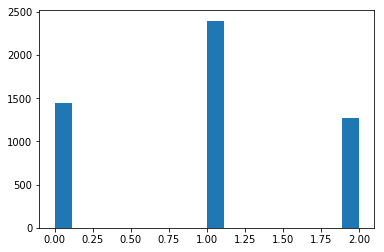

In [78]:
y = y_train_5eme['angle_categorical']
rank = range(len(y[0]))

plt.hist(np.dot(y[:], rank), bins='auto')
plt.show()

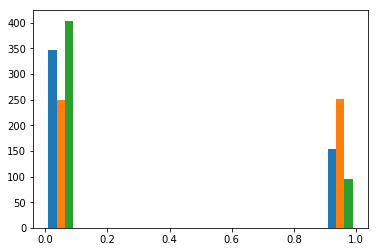

In [74]:
# histogram of Y values

y_angle = y_val['angle_categorical']

plt.hist(y_angle, bins='auto')
plt.show()

Structure:
- import data
- train (3 tubs) / test (1 different tub) split
- apply data augmentations
- train + validate

Interface
testor.benchmark([['processing1', 'processing2'], 
                  ['processing4', 'processing2', 'processing5']])
                  
generate_brightness
generate_night_effect
generate_random_shadows

In [ ]:
# equilibrate class ratio


In [ ]:
generate_brightness


In [16]:
res = aug.add_random_shadow(x_train_5eme[0], y_train_5eme['angle_categorical'][0])

In [9]:
import augmentation as aug

In [11]:
bight_x_train_5eme, bright_y_train_5eme = aug.generate_brightness(x_train_5eme, y_train_5eme)
bight_x_train_5eme, bright_y_train_5eme = aug.generate_night_effect(x_train_5eme, y_train_5eme)
bight_x_train_5eme, bright_y_train_5eme = aug.generate_random_shadows(x_train_5eme, y_train_5eme)

  0%|          | 0/1278 [00:00<?, ?it/s]


KeyError: 363

In [9]:
# visualise transformations

origin_img = x_train_5eme[5][40:]

res = aug.add_random_shadow(origin_img, y_train_5eme['angle_categorical'][0])
img = Image.fromarray(x_train_5eme[0][40:], 'RGB')
img.show()
img = Image.fromarray(res[0], 'RGB')
img.show()

In [78]:
img = Image.fromarray(x_train_5eme[0][40:], 'RGB')
img.show()